In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [ ]:
data = fetch_california_housing()

In [ ]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
df = pd.DataFrame(data['data'], columns = data['feature_names'])
df[data['target_names'][0]] = data['target']
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5943232652466173

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
model = KNeighborsRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.14312051440566032

In [ ]:
model = KNeighborsRegressor()
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

0.6965930580761679

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

0.5943232652466198

In [ ]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5306065925145129

In [ ]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

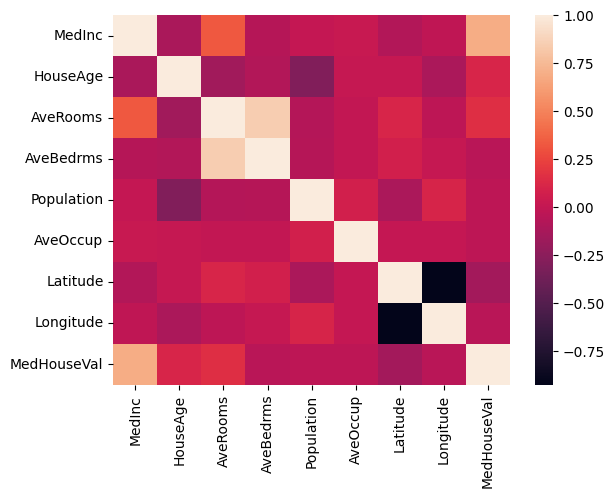

In [ ]:
import seaborn as sns
sns.heatmap(df.corr())

In [ ]:
df_ser = df.corr()['MedHouseVal']
df_ser

MedInc         0.688075
HouseAge       0.105623
AveRooms       0.151948
AveBedrms     -0.046701
Population    -0.024650
AveOccup      -0.023737
Latitude      -0.144160
Longitude     -0.045967
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

In [ ]:
df_new = df.loc[:, df_ser[df_ser>0.6].index]

In [ ]:
df_new

,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.6431,3.413
4,3.8462,3.422
...,...,...
20635,1.5603,0.781
20636,2.5568,0.771
20637,1.7000,0.923
20638,1.8672,0.847


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new[['MedInc']], df_new['MedHouseVal'], test_size=0.2, random_state = 0)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.4466846804895943

In [ ]:
import numpy as np
df_new = df.loc[:, df_ser[np.abs(df_ser)>0.1].index]
df_new = df_new.drop('Latitude', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new.drop('MedHouseVal', axis=1), df_new['MedHouseVal'], test_size=0.2, random_state = 0)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.4882522385579554

In [ ]:
df_new

,MedInc,HouseAge,AveRooms,MedHouseVal
0,8.3252,41.0,6.984127,4.526
1,8.3014,21.0,6.238137,3.585
2,7.2574,52.0,8.288136,3.521
3,5.6431,52.0,5.817352,3.413
4,3.8462,52.0,6.281853,3.422
...,...,...,...,...
20635,1.5603,25.0,5.045455,0.781
20636,2.5568,18.0,6.114035,0.771
20637,1.7000,17.0,5.205543,0.923
20638,1.8672,18.0,5.329513,0.847


In [ ]:

sns.pairplot(df)

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7fae28f4dd80> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fae28f4d000> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt

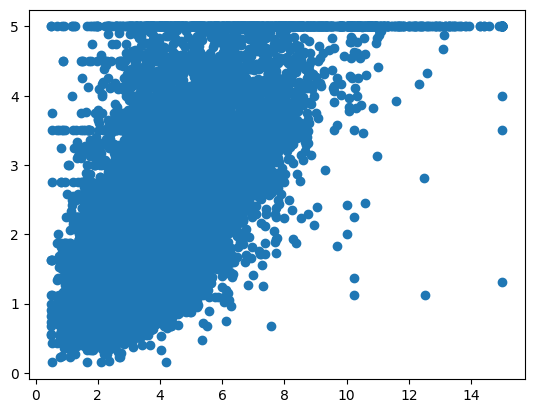

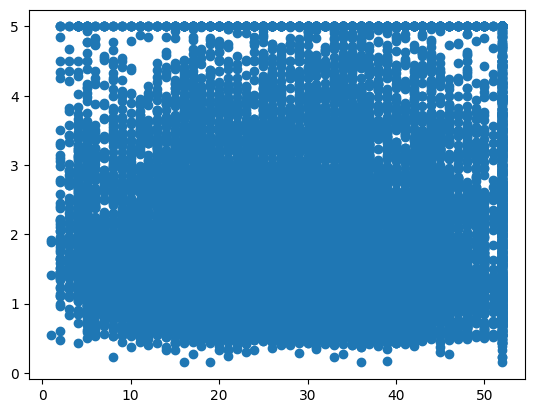

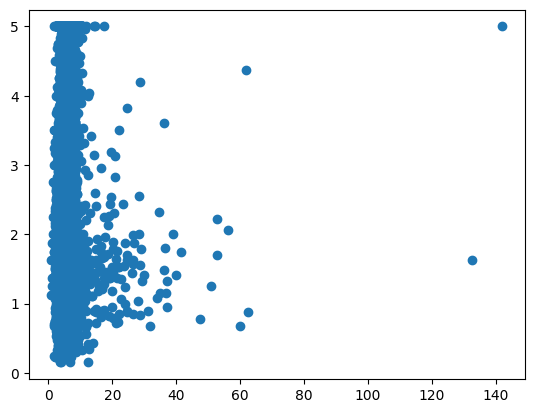

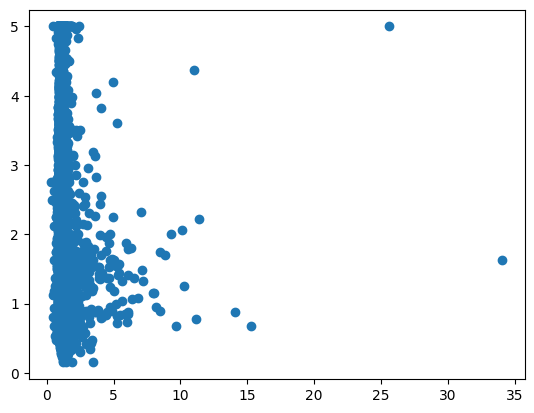

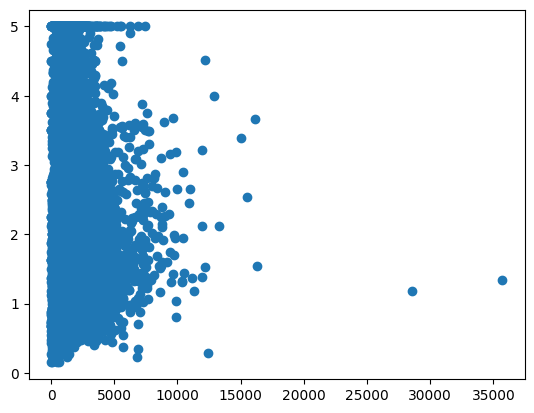

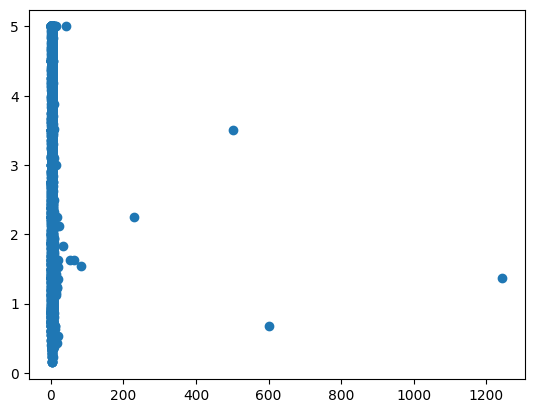

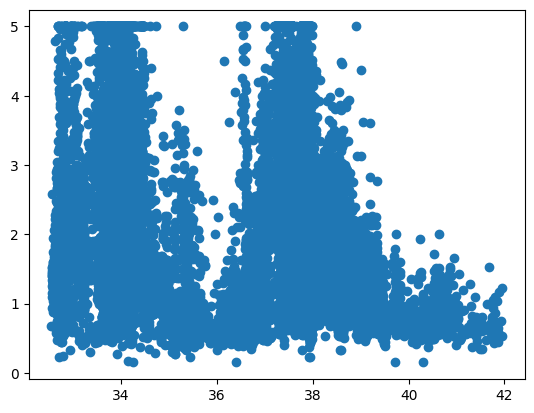

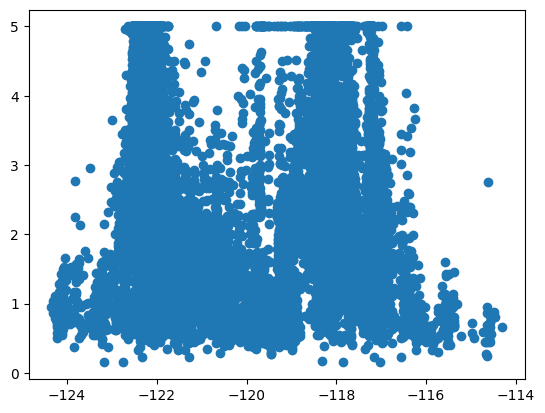

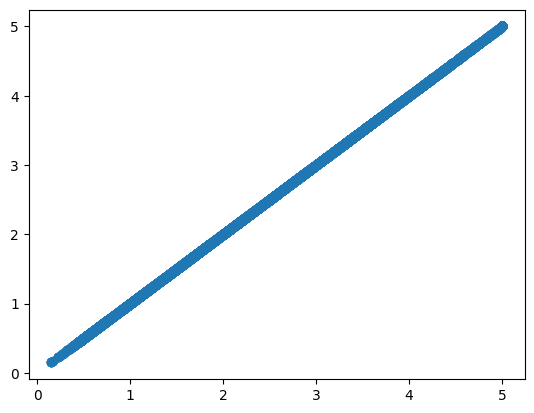

In [ ]:
for c in df.columns:
  plt.scatter(df[c], df.iloc[:, -1])
  plt.show()

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
data = fetch_california_housing()

In [ ]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
X, y = fetch_california_housing(return_X_y=True)

In [ ]:
X, y = fetch_california_housing(return_X_y=True, as_frame = True)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [ ]:
X = fetch_california_housing(return_X_y=False, as_frame = True)

In [ ]:
X['frame']

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
# Creating dataframe
df = pd.DataFrame({'X':range(-100, 101)})
df['y'] = df['X']**2

In [ ]:
df

,X,y
0,-100,10000
1,-99,9801
2,-98,9604
3,-97,9409
4,-96,9216
...,...,...
196,96,9216
197,97,9409
198,98,9604
199,99,9801


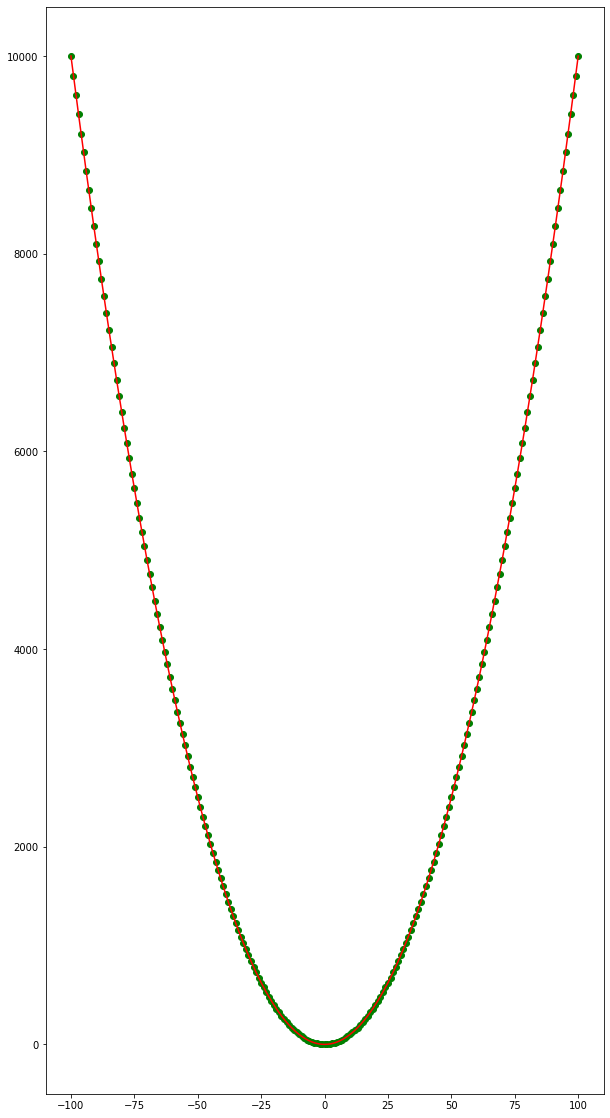

In [ ]:
# Visualizing Data
plt.figure(figsize = (10, 20))
plt.plot(df['X'], df['y'], color = 'red')
plt.scatter(df['X'], df['y'], color = 'green')

In [ ]:
# Breaking Data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['X']], df['y'], test_size = 0.1, random_state = 0)

In [ ]:
# Importing Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

1.0

In [ ]:
help(lr)

In [ ]:
lr.coef_, lr.intercept_

(array([1.27988407]), 3296.592646700586)

In [ ]:
y_pred = lr.predict(X_test)
pd.DataFrame(zip(y_test, y_pred), columns = ['actual', 'predicted'])

,actual,predicted
0,6724,3191.642153
1,4900,3386.184531
2,49,3305.551835
3,4,3294.032879
4,5929,3395.143720
5,6724,3401.543140
6,9025,3175.003660
7,2116,3355.467314
8,7744,3183.962849
9,2704,3363.146618


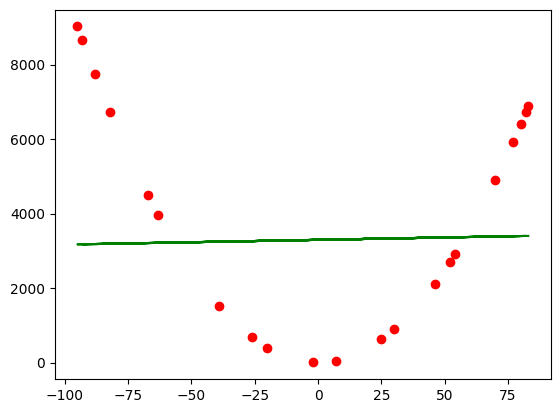

In [ ]:
plt.scatter(X_test.values, y_test, color = 'red')
plt.plot(X_test.values, y_pred, color = 'green')

In [ ]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9990235182137605

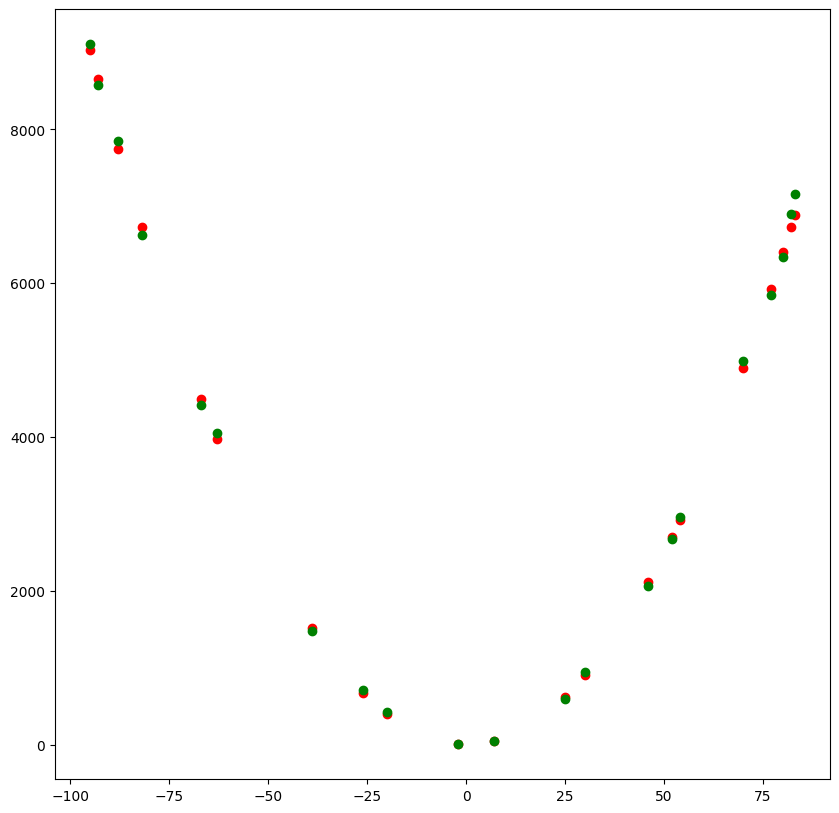

In [ ]:
y_pred = knn.predict(X_test)
plt.figure(figsize = (10, 10))
plt.scatter(X_test.values, y_test, color = 'red')
plt.scatter(X_test.values, y_pred, color = 'green')

In [ ]:
# Get data in terms of table
pd.DataFrame(zip(y_test, y_pred), columns = ['actual', 'predicted'])

,actual,predicted
0,6724,6629.4
1,4900,4987.8
2,49,44.4
3,4,10.2
4,5929,5840.4
5,6724,6895.8
6,9025,9105.8
7,2116,2064.6
8,7744,7853.4
9,2704,2667.2


In [ ]:
from sklearn.preprocessing import RobustScaler
rsc = RobustScaler()
X_train_scaled = rsc.fit_transform(X_train)
X_test_scaled = rsc.transform(X_test)
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.999425172909935

In [ ]:
X_train_scaled

array([[ 0.46666667],
       [-0.55897436],
       [ 0.61025641],
       [-0.40512821],
       [ 0.24102564],
       [ 0.81538462],
       [ 0.87692308],
       [ 0.23076923],
       [-0.56923077],
       [-0.85641026],
       [-0.45641026],
       [ 0.51794872],
       [ 0.11794872],
       [-0.79487179],
       [ 0.91794872],
       [ 0.3025641 ],
       [-0.97948718],
       [-0.16923077],
       [ 0.06666667],
       [ 0.35384615],
       [-0.34358974],
       [-0.75384615],
       [ 0.13846154],
       [ 0.7025641 ],
       [-0.37435897],
       [-0.93846154],
       [-0.25128205],
       [ 0.18974359],
       [ 0.44615385],
       [-0.29230769],
       [ 0.25128205],
       [ 0.86666667],
       [-0.02564103],
       [ 0.50769231],
       [-0.77435897],
       [-0.71282051],
       [ 0.62051282],
       [-0.61025641],
       [-0.44615385],
       [ 0.32307692],
       [-0.03589744],
       [ 0.83589744],
       [-0.82564103],
       [ 0.54871795],
       [-0.07692308],
       [-0

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


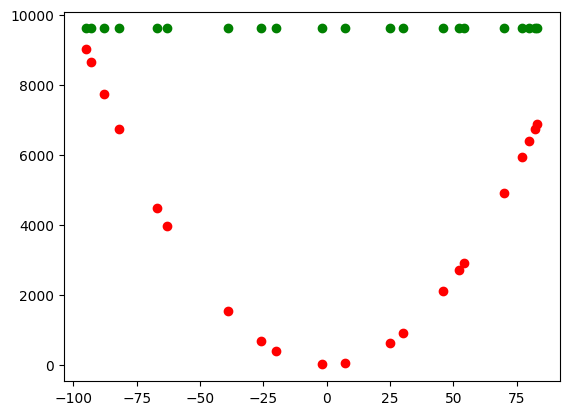

In [ ]:
y_pred = knn.predict(X_test)
plt.scatter(X_test.values, y_test, color = 'red')
plt.scatter(X_test.values, y_pred, color = 'green')

In [ ]:
# Get data in terms of table
y_pred = knn.predict(X_test)
pd.DataFrame(zip(y_test, y_pred), columns = ['actual', 'predicted'])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


,actual,predicted
0,6724,9606.0
1,4900,9606.0
2,49,9606.0
3,4,9606.0
4,5929,9606.0
5,6724,9606.0
6,9025,9606.0
7,2116,9606.0
8,7744,9606.0
9,2704,9606.0


# Polynomial Regression

In [ ]:
df

,X,y
0,-100,10000
1,-99,9801
2,-98,9604
3,-97,9409
4,-96,9216
...,...,...
196,96,9216
197,97,9409
198,98,9604
199,99,9801


In [ ]:
df['X2'] = df['X']**2

In [ ]:
df

,X,y,X2
0,-100,10000,10000
1,-99,9801,9801
2,-98,9604,9604
3,-97,9409,9409
4,-96,9216,9216
...,...,...,...
196,96,9216,9216
197,97,9409,9409
198,98,9604,9604
199,99,9801,9801


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['X', 'X2']], df['y'], test_size = 0.1, random_state = 0)

In [ ]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

1.0

In [ ]:
lr.coef_, lr.intercept_

(array([9.48474592e-17, 1.00000000e+00]), 0.0)

In [ ]:
y_pred = lr.predict(X_test)
pd.DataFrame(zip(y_test, y_pred), columns = ['actual', 'predicted'])

,actual,predicted
0,6724,6724.0
1,4900,4900.0
2,49,49.0
3,4,4.0
4,5929,5929.0
5,6724,6724.0
6,9025,9025.0
7,2116,2116.0
8,7744,7744.0
9,2704,2704.0


In [ ]:
df = df.drop(['X2'], axis=1)

In [ ]:
df

,X,y
0,-100,10000
1,-99,9801
2,-98,9604
3,-97,9409
4,-96,9216
...,...,...
196,96,9216
197,97,9409
198,98,9604
199,99,9801


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_transformed = poly.fit_transform(df[['X']])

In [ ]:
pd.DataFrame(X_transformed)

,0,1,2
0,1.0,-100.0,10000.0
1,1.0,-99.0,9801.0
2,1.0,-98.0,9604.0
3,1.0,-97.0,9409.0
4,1.0,-96.0,9216.0
...,...,...,...
196,1.0,96.0,9216.0
197,1.0,97.0,9409.0
198,1.0,98.0,9604.0
199,1.0,99.0,9801.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, df['y'], test_size = 0.1, random_state = 0)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

1.0

In [ ]:
lr.coef_, lr.intercept_

(array([ 0.00000000e+00, -6.77236045e-15,  1.00000000e+00]),
 -1.3642420526593924e-12)

In [ ]:
y_pred = lr.predict(X_test)
pd.DataFrame(zip(y_test, y_pred), columns = ['actual', 'predicted'])

,actual,predicted
0,6724,6724.0
1,4900,4900.0
2,49,49.0
3,4,4.0
4,5929,5929.0
5,6724,6724.0
6,9025,9025.0
7,2116,2116.0
8,7744,7744.0
9,2704,2704.0


In [ ]:
X_test.shape, y_test.shape, y_pred.shape

((21, 3), (21,), (21,))

In [ ]:
X_test

array([[ 1.000e+00, -8.200e+01,  6.724e+03],
       [ 1.000e+00,  7.000e+01,  4.900e+03],
       [ 1.000e+00,  7.000e+00,  4.900e+01],
       [ 1.000e+00, -2.000e+00,  4.000e+00],
       [ 1.000e+00,  7.700e+01,  5.929e+03],
       [ 1.000e+00,  8.200e+01,  6.724e+03],
       [ 1.000e+00, -9.500e+01,  9.025e+03],
       [ 1.000e+00,  4.600e+01,  2.116e+03],
       [ 1.000e+00, -8.800e+01,  7.744e+03],
       [ 1.000e+00,  5.200e+01,  2.704e+03],
       [ 1.000e+00, -3.900e+01,  1.521e+03],
       [ 1.000e+00,  2.500e+01,  6.250e+02],
       [ 1.000e+00,  8.000e+01,  6.400e+03],
       [ 1.000e+00,  5.400e+01,  2.916e+03],
       [ 1.000e+00, -2.000e+01,  4.000e+02],
       [ 1.000e+00, -9.300e+01,  8.649e+03],
       [ 1.000e+00, -6.700e+01,  4.489e+03],
       [ 1.000e+00,  3.000e+01,  9.000e+02],
       [ 1.000e+00, -6.300e+01,  3.969e+03],
       [ 1.000e+00, -2.600e+01,  6.760e+02],
       [ 1.000e+00,  8.300e+01,  6.889e+03]])

In [ ]:
X_test

array([[ 1.000e+00, -8.200e+01,  6.724e+03],
       [ 1.000e+00,  7.000e+01,  4.900e+03],
       [ 1.000e+00,  7.000e+00,  4.900e+01],
       [ 1.000e+00, -2.000e+00,  4.000e+00],
       [ 1.000e+00,  7.700e+01,  5.929e+03],
       [ 1.000e+00,  8.200e+01,  6.724e+03],
       [ 1.000e+00, -9.500e+01,  9.025e+03],
       [ 1.000e+00,  4.600e+01,  2.116e+03],
       [ 1.000e+00, -8.800e+01,  7.744e+03],
       [ 1.000e+00,  5.200e+01,  2.704e+03],
       [ 1.000e+00, -3.900e+01,  1.521e+03],
       [ 1.000e+00,  2.500e+01,  6.250e+02],
       [ 1.000e+00,  8.000e+01,  6.400e+03],
       [ 1.000e+00,  5.400e+01,  2.916e+03],
       [ 1.000e+00, -2.000e+01,  4.000e+02],
       [ 1.000e+00, -9.300e+01,  8.649e+03],
       [ 1.000e+00, -6.700e+01,  4.489e+03],
       [ 1.000e+00,  3.000e+01,  9.000e+02],
       [ 1.000e+00, -6.300e+01,  3.969e+03],
       [ 1.000e+00, -2.600e+01,  6.760e+02],
       [ 1.000e+00,  8.300e+01,  6.889e+03]])

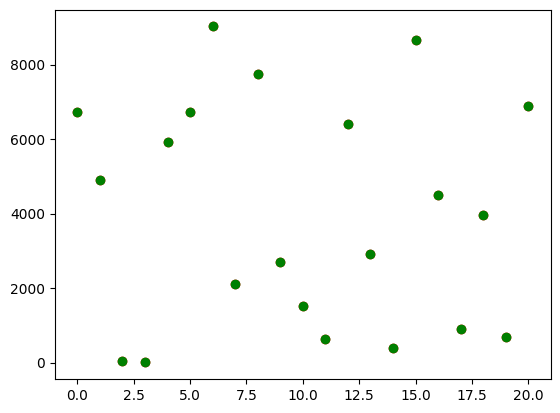

In [ ]:
# Plotting Actual vs Predicted Data
plt.scatter(range(len(X_test)), y_test, color = 'red')
plt.scatter(range(len(X_test)), y_pred, color = 'green')

In [ ]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = data['data']
y = data['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6098033978087867

In [ ]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

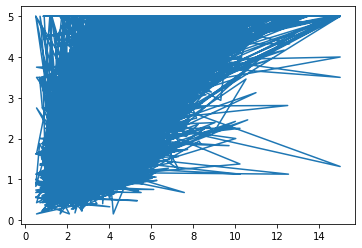

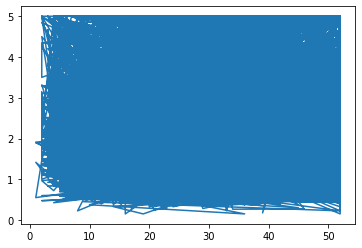

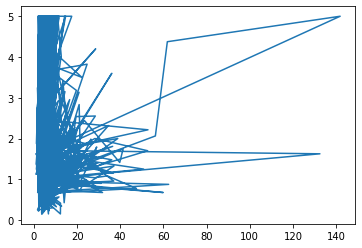

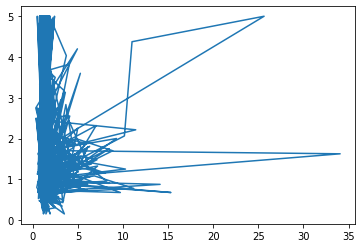

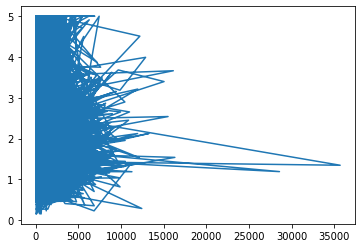

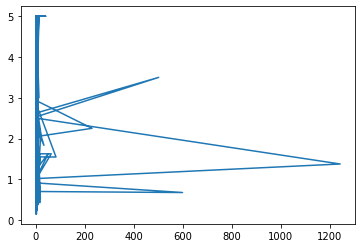

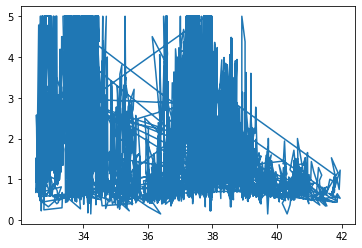

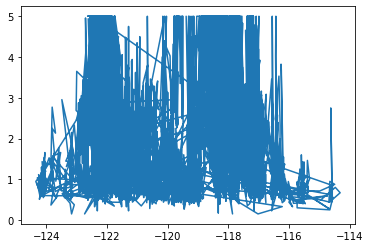

In [ ]:
# To get the plot for x values wrt output
for c in range(X.shape[1]):
  plt.plot(X[:, c], y)
  plt.show()

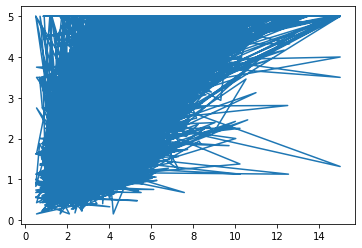

In [ ]:
plt.plot(X[:, 0], y)

In [ ]:
from sklearn.preprocessing import PowerTransformer 
poly = PowerTransformer(method = 'box-cox')
x_0 = poly.fit_transform(X[:, 0].reshape(-1, 1))

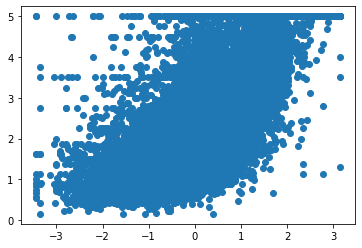

In [ ]:
plt.scatter(x_0, y)

In [ ]:
from sklearn.preprocessing import PowerTransformer 
poly = PowerTransformer()
x_0 = poly.fit_transform(X[:, 0].reshape(-1, 1))

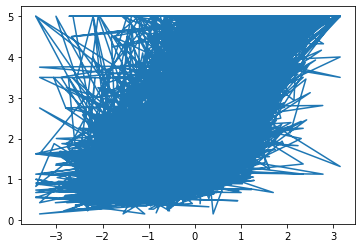

In [ ]:
plt.plot(x_0, y)

In [ ]:
X[:, 0].min(), X[:, 0].max()

(0.4999, 15.0001)

In [ ]:
pd.Series(X[:, 0]).describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f136fc68550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f136fc68c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f136fc68190>],
 'medians': [<matplotlib.lines.Line2D at 0x7f136fc0f280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f136fc0f580>],
 'means': []}

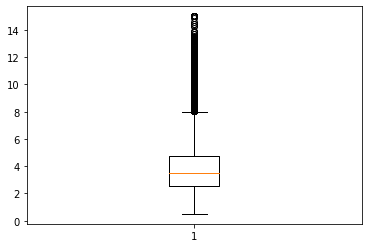

In [ ]:
plt.boxplot(X[:, 0])

In [ ]:
X1 = pd.Series(X[:, 0])
X1[X1>11].sort_values()

11010    11.0124
10726    11.0138
18347    11.0492
10999    11.0546
10402    11.0567
          ...   
4606     15.0001
16910    15.0001
4605     15.0001
17107    15.0001
8854     15.0001
Length: 158, dtype: float64

In [ ]:
bin = [0, 4, 6, 8, 10, 12, 14, 16]
pd.cut(X1, bins = bin).value_counts()

(0, 4]      12553
(4, 6]       5725
(6, 8]       1672
(8, 10]       382
(10, 12]      195
(14, 16]       57
(12, 14]       56
dtype: int64

In [ ]:
pd.cut(X1, bins = bin).value_counts(normalize = True)

(0, 4]      0.608188
(4, 6]      0.277374
(6, 8]      0.081008
(8, 10]     0.018508
(10, 12]    0.009448
(14, 16]    0.002762
(12, 14]    0.002713
dtype: float64

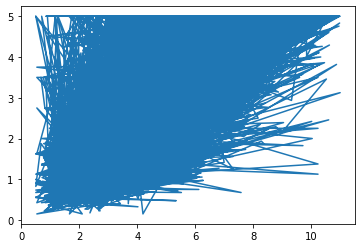

In [ ]:
plt.plot(X1[X1<11], y[X1[X1<11].index])

In [ ]:
y[X1[X1<11].index]

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])